In [104]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from apyori import apriori
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from scipy import stats

In [70]:
dataPath = "/home/youngjai/yjGit/bayesProgramming/data/dataset.csv"
df = pd.read_csv(dataPath)
df = df.drop(["index"], axis=1)


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

# Chisq Test

In [108]:
xcols = df.columns[:-1]
for col in xcols:
    table = pd.crosstab(df[col], df["Result"])
    if stats.chi2_contingency(table, correction=False)[1] > 0.01:
        print(col)

Favicon
Submitting_to_email
Redirect
RightClick
popUpWidnow
Iframe


In [ ]:
[xcols[idx] idx ]

In [105]:
table = pd.crosstab(df["having_At_Symbol"], df["Result"])
res = stats.chi2_contingency(table, correction=False)

In [106]:
res

(30.992343139866524,
 2.5904836871139885e-08,
 1,
 array([[ 733.26006332,  921.73993668],
        [4164.73993668, 5235.26006332]]))

In [154]:
for col in xcols:
    df[col] =df[col].astype(str)
dummied = pd.get_dummies(df, drop_first=True) 

In [155]:
xcols

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

In [156]:
dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Result                         11055 non-null  int64
 1   having_IPhaving_IP_Address_1   11055 non-null  uint8
 2   URLURL_Length_0                11055 non-null  uint8
 3   URLURL_Length_1                11055 non-null  uint8
 4   Shortining_Service_1           11055 non-null  uint8
 5   having_At_Symbol_1             11055 non-null  uint8
 6   double_slash_redirecting_1     11055 non-null  uint8
 7   Prefix_Suffix_1                11055 non-null  uint8
 8   having_Sub_Domain_0            11055 non-null  uint8
 9   having_Sub_Domain_1            11055 non-null  uint8
 10  SSLfinal_State_0               11055 non-null  uint8
 11  SSLfinal_State_1               11055 non-null  uint8
 12  Domain_registeration_length_1  11055 non-null  uint8
 13  Favicon_1       

In [7]:
for col in xcols:
    if df[col].unique().shape[0] > 2:
        print(col)

URLURL_Length
having_Sub_Domain
SSLfinal_State
URL_of_Anchor
Links_in_tags
SFH
web_traffic
Links_pointing_to_page


In [157]:
xcols = dummied.columns[1:]
ycol = dummied.columns[0]
ycol

'Result'

In [158]:
trainX

NameError: name 'trainX' is not defined

In [159]:

dummied_y = np.where(dummied[ycol] == -1, 0 ,1)
trainX, testX, trainY, testY = train_test_split(dummied[xcols], dummied_y, test_size = 0.25)

In [160]:
trainY

array([0, 0, 1, ..., 1, 0, 1])

In [24]:
lr_model = sm.Logit(trainY, trainX)
result = lr_model.fit(method = "bfgs")


         Current function value: 0.157610
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/home/youngjai/pythonVenv/tensorflow1/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8291
Model:                          Logit   Df Residuals:                     8253
Method:                           MLE   Df Model:                           37
Date:                Thu, 14 May 2020   Pseudo R-squ.:                  0.7706
Time:                        22:29:19   Log-Likelihood:                -1306.7
converged:                      False   LL-Null:                       -5695.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
having_IPhaving_IP_Address_1      1.5674      0.153     10.264      0.000       1.268       1.867
URLURL_Length_0                  -0.5151      0.498     -1.034      0.301      -1.491       0.461
URLURL_Length_1                  -0.3701      0.177     -2.096      0.036      -0.716      -0.024
Shortining_Service_1             -1.5109      0.360     -4.200      0.000      -2.216      -0.806
having_At_Symbol_1                0.0958      0.188      0.508      0.611      -0.274       0.465
double_slash_redirecting_1       -0.7302      0.386     -1.890      0.059      -1.487       0.027
Prefix_Suffix_1                   3.7664      0.436      8.634      0.000       2.911       4.621
having_Sub_Domain_0              -0.3088      0.126     -2.445      0.014      -0.556      -0.061
having_Sub_Domain_1               1.3471      0.134     10.076      0.000       1.085       1.609
SSLfinal_State_0                 -2.2061      0.320     -6.884      0.000      -2.834      -1.578
SSLfinal_State_1                  3.1517      0.119     26.384      0.000       2.918       3.386
Domain_registeration_length_1    -0.9466      0.139     -6.834      0.000      -1.218      -0.675
Favicon_1                        -0.1471      0.440     -0.334      0.738      -1.009       0.715
port_1                           -0.0765      0.357     -0.214      0.830      -0.775       0.623
HTTPS_token_1                    -0.9181      0.267     -3.435      0.001      -1.442      -0.394
Request_URL_1                     0.0121      0.131      0.093      0.926      -0.244       0.268
URL_of_Anchor_0                   3.8490      0.202     19.097      0.000       3.454       4.244
URL_of_Anchor_1                   5.2819      0.240     22.036      0.000       4.812       5.752
Links_in_tags_0                   1.3652      0.119     11.430      0.000       1.131       1.599
Links_in_tags_1                   0.8308      0.138      6.037      0.000       0.561       1.101
SFH_0                             1.1556      0.219      5.266      0.000       0.725       1.586
SFH_1                             1.4007      0.184      7.614      0.000       1.040       1.761
Submitting_to_email_1             0.3039      0.232      1.311      0.190      -0.151       0.758
Abnormal_URL_1                   -0.9223      0.300     -3.077      0.002      -1.510      -0.335
Redirect_1                       -2.0039      0.221     -9.075      0.000      -2.437      -1.571
on_mouseover_1                    0.1432      0.301      0.475      0.634      -0.447       0.734
RightClick_1                     -2.0437      0.336     -6.081      0.000      -2.702      -1.385
popUpWidnow_1                     0.1491      0.428      0.349      0.727      -0.689       0.987
Iframe_1                         -0.8263      0.347     -2.378      0.017      -1.507      -0.145
age_of_domain_1                  -0.3039      0.112     -2.726      0.006      -0.522      -0.085
DNSReco

# GBT 

In [163]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=25) # 기본값: max_depth=3, learning_rate=0.1
gbc.fit(trainX, trainY)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=25,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [164]:
score_train = gbc.score(trainX, trainY) # train set 정확도

print('{:.3f}'.format(score_train))




score_test = gbc.score(testX, testY) # 일반화 정확도

print('{:.3f}'.format(score_test))


0.990
0.971


In [165]:
len(trainX.columns)

38

In [166]:
len(gbc.feature_importances_)


38

In [167]:
impt_dict = {}
for idx in range(0, 38):
    impt_dict[idx] = gbc.feature_importances_[idx]

result = {k: v for k, v in sorted(impt_dict.items(), key=lambda item: item[1])}  
result

{1: 0.0005286911490542764,
 28: 0.0007835870949852498,
 13: 0.001157215226491703,
 25: 0.0020314034230469306,
 23: 0.0022507340001841456,
 27: 0.0028187976559084864,
 14: 0.0031525121524381933,
 37: 0.0033535589622289896,
 5: 0.0034558529661372823,
 12: 0.0034568323428327712,
 26: 0.0035024284049154112,
 20: 0.003727996807177726,
 4: 0.003938380648180761,
 24: 0.004253500775943855,
 9: 0.004424643317397294,
 35: 0.004706784508462106,
 22: 0.005219273249354342,
 3: 0.005274115303622706,
 21: 0.006522169742457378,
 30: 0.0065817255830659645,
 0: 0.008243051733229059,
 32: 0.008264321068887403,
 15: 0.0089535174070867,
 7: 0.009440152205564602,
 33: 0.009745610213530424,
 19: 0.010960799359464733,
 2: 0.011312883620854234,
 36: 0.011373957010253998,
 34: 0.012689611757542624,
 18: 0.013136933918797417,
 29: 0.0158530771266731,
 11: 0.018397273157378664,
 8: 0.022536841818903804,
 17: 0.03161732805448681,
 6: 0.03559234117585835,
 31: 0.036476594166888934,
 16: 0.0541141075122477,
 10: 0.6

In [168]:
top_columns = []
impt = []
for idx in range(31, 38):
    temp = list(result)[idx]
    impt.append(result[temp])
    top_columns.append(trainX.columns[list(result)[idx]])
    

In [169]:
indices

NameError: name 'indices' is not defined

Feature ranking:
SSLfinal_State_1. : (0.610151)
URL_of_Anchor_0. : (0.054114)
web_traffic_0. : (0.036477)
Prefix_Suffix_1. : (0.035592)
URL_of_Anchor_1. : (0.031617)
having_Sub_Domain_1. : (0.022537)
Domain_registeration_length_1. : (0.018397)
age_of_domain_1. : (0.015853)
Links_in_tags_0. : (0.013137)
Google_Index_1. : (0.012690)


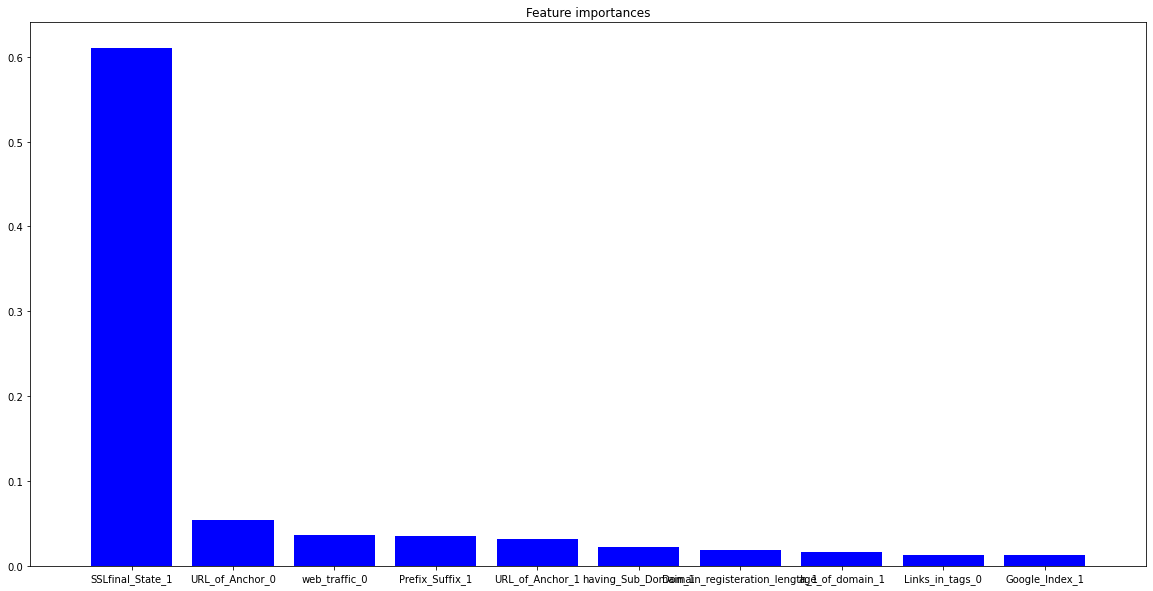

In [170]:

importances = gbc.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%s. : (%f)" % ( trainX.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar( trainX.columns[indices[:10]], importances[indices[:10]],
        color="b", align="center")
plt.xticks(range(10), trainX.columns[indices[:10]])
plt.xlim([-1, 10])
plt.show()

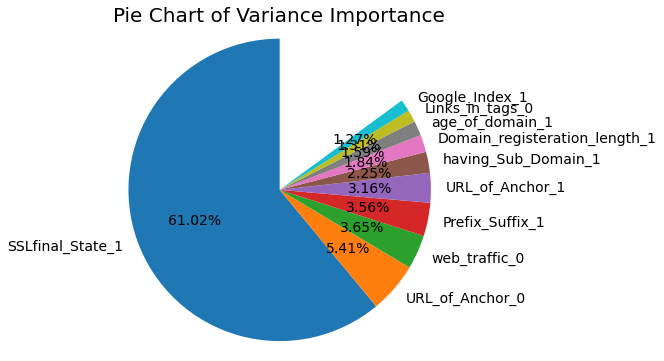

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

group_names = trainX.columns[indices[:10]]

group_sizes = importances[indices[:10]]

plt.pie(group_sizes, labels=group_names, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14}) 
plt.axis('equal') #  equal length of X and Y axis

plt.title('Pie Chart of Variance Importance', fontsize=20)

plt.show()


## 변수를 제거해보자 

In [125]:
df = df.drop(["SSLfinal_State"], axis=1)

In [126]:
xcols = df.columns[:-1]
xcols

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'Domain_registeration_length', 'Favicon', 'port',
       'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report'],
      dtype='object')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   Domain_registeration_length  11055 non-null  int64
 8   Favicon                      11055 non-null  int64
 9   port                         11055 non-null  int64
 10  HTTPS_token                  11055 non-null  int64
 11  Request_URL                  11055 non-null  int64
 12  URL_of_Anchor                11055 non-null  int64
 13  Links_in_tags                11055 non-null  i

In [175]:
if df["Result"].unique().shape[0] > 2:
    df["Result"] = np.where(df["Result"] == -1, 0 ,1)

for col in xcols:
    df[col] =df[col].astype(str)
dummied_X = pd.get_dummies(df[xcols], drop_first=True)
dummied_X.info()


KeyError: 'having_IPhaving_IP_Address_1'

In [174]:
df["Result"] = np.where(df["Result"] == -1, 0 ,1)
yData = df["Result"]
trainX2, testX2, trainY2, testY2 = train_test_split(dummied_X, yData, test_size = 0.25)

NameError: name 'dummied_X' is not defined

In [132]:
trainY2.unique()

array([0, 1])

In [173]:
gbc2 = GradientBoostingClassifier(random_state=0, max_depth=25) # 기본값: max_depth=3, learning_rate=0.1
gbc2.fit(trainX2, trainY2)

NameError: name 'trainX2' is not defined

In [135]:
score_train2 = gbc2.score(trainX2, trainY2) # train set 정확도
print('{:.3f}'.format(score_train2))

score_test2 = gbc2.score(testX2, testY2) # 일반화 정확도
print('{:.3f}'.format(score_test2))

0.982
0.945


Feature ranking:
URL_of_Anchor_0. : (0.386272)
URL_of_Anchor_1. : (0.177702)
web_traffic_0. : (0.041493)
having_Sub_Domain_1. : (0.033671)
Prefix_Suffix_1. : (0.029556)
Request_URL_1. : (0.024191)
Links_in_tags_1. : (0.023088)
web_traffic_1. : (0.020535)
having_IPhaving_IP_Address_1. : (0.019574)
Domain_registeration_length_1. : (0.019541)


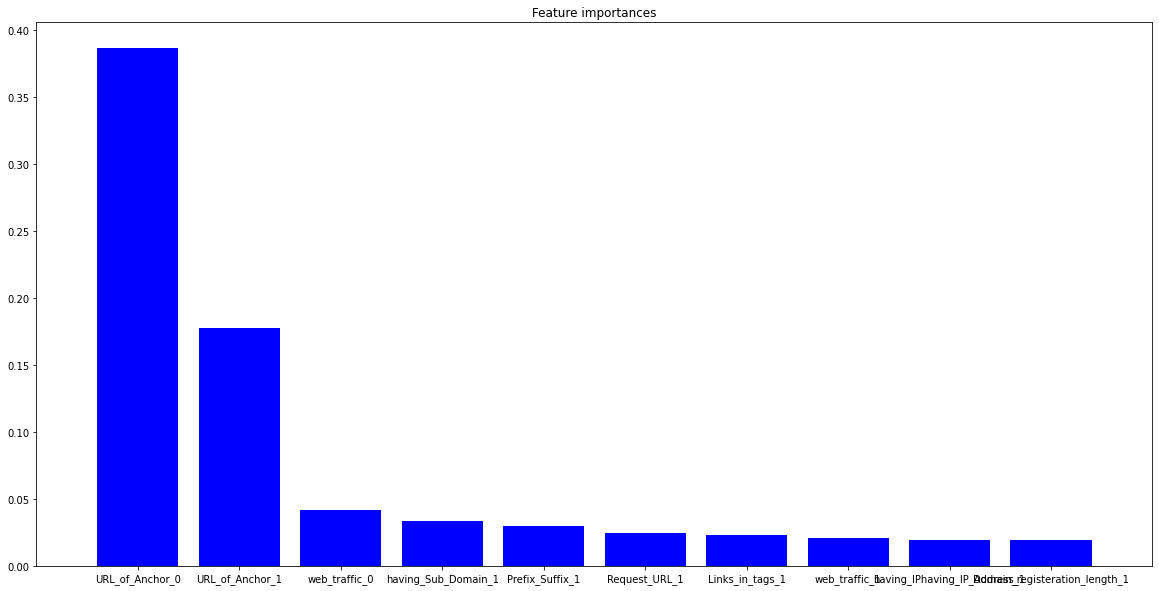

In [137]:
importances = gbc2.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%s. : (%f)" % ( trainX2.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar( trainX2.columns[indices[:10]], importances[indices[:10]],
        color="b", align="center")
plt.xticks(range(10), trainX2.columns[indices[:10]])
plt.xlim([-1, 10])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

group_names = trainX.columns[indices[:10]]

group_sizes = importances[indices[:10]]

plt.pie(group_sizes, labels=group_names, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14}) 
plt.axis('equal') #  equal length of X and Y axis

plt.title('Pie Chart of Variance Importance', fontsize=20)

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   having_IPhaving_IP_Address_1   11055 non-null  uint8
 1   URLURL_Length_0                11055 non-null  uint8
 2   URLURL_Length_1                11055 non-null  uint8
 3   Shortining_Service_1           11055 non-null  uint8
 4   having_At_Symbol_1             11055 non-null  uint8
 5   double_slash_redirecting_1     11055 non-null  uint8
 6   Prefix_Suffix_1                11055 non-null  uint8
 7   having_Sub_Domain_0            11055 non-null  uint8
 8   having_Sub_Domain_1            11055 non-null  uint8
 9   Domain_registeration_length_1  11055 non-null  uint8
 10  Favicon_1                      11055 non-null  uint8
 11  port_1                         11055 non-null  uint8
 12  HTTPS_token_1                  11055 non-null  uint8
 13  Request_URL_1   

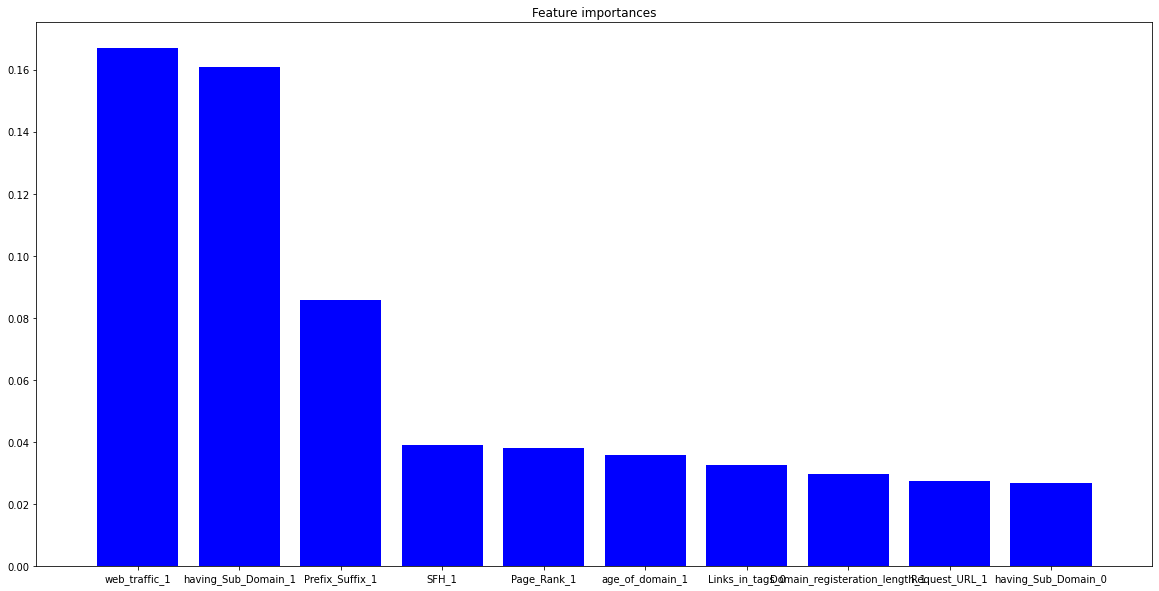

In [140]:
df = df.drop(["SSLfinal_State", "URL_of_Anchor"], axis=1)
xcols = df.columns[:-1]
for col in xcols:
    df[col] =df[col].astype(str)
dummied_X = pd.get_dummies(df[xcols], drop_first=True)
dummied_X.info()

df["Result"] = np.where(df["Result"] == -1, 0 ,1)
yData = df["Result"]
trainX2, testX2, trainY2, testY2 = train_test_split(dummied_X, yData, test_size = 0.25)

gbc2 = GradientBoostingClassifier(random_state=0, max_depth=25) # 기본값: max_depth=3, learning_rate=0.1
gbc2.fit(trainX2, trainY2)

score_train2 = gbc2.score(trainX2, trainY2) # train set 정확도
print('{:.3f}'.format(score_train2))

score_test2 = gbc2.score(testX2, testY2) # 일반화 정확도
print('{:.3f}'.format(score_test2))

importances = gbc2.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%s. : (%f)" % ( trainX2.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar( trainX2.columns[indices[:10]], importances[indices[:10]],
        color="b", align="center")
plt.xticks(range(10), trainX2.columns[indices[:10]])
plt.xlim([-1, 10])
plt.show()

## Association Rule

In [109]:
newDf = df.drop(["Favicon", "Submitting_to_email", "Redirect", "RightClick", "popUpWidnow", "Iframe"], axis=1)
maliciousDf = newDf[newDf["Result"] == -1]
benignDf = newDf[newDf["Result"] !=-1]


In [110]:
newDf.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags',
       'SFH', 'Abnormal_URL', 'on_mouseover', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [111]:
benignDf = benignDf.drop(["Result"], axis=1)
benignDf = benignDf.reset_index(drop=True)
maliciousDf = maliciousDf.drop(["Result"], axis=1)
maliciousDf = maliciousDf.reset_index(drop=True)

In [112]:
benignDf.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,-1,0,-1,1,1,1
1,-1,0,-1,1,-1,-1,1,1,-1,1,...,-1,-1,1,1,1,1,-1,1,-1,-1
2,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,1,1,-1,1,1,1,0,1
3,1,1,1,1,1,-1,0,1,1,1,...,-1,-1,1,-1,1,1,1,1,-1,-1
4,1,1,-1,1,1,1,-1,1,-1,1,...,1,1,1,1,-1,1,-1,1,-1,1


In [113]:
maliciousDf.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,-1,-1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,-1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,-1,-1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,-1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,-1,-1,1,1,...,-1,-1,1,1,-1,-1,-1,1,0,-1


In [180]:
assocDf = []
num_records = len(benignDf)
for r in range(0, num_records):
    aRecord = []
    for col in benignDf.columns:
        if benignDf[col][r] == 1:
            aRecord.append(col)
    assocDf.append(aRecord)
  

In [144]:
benignRule2 = apriori(assocDf, min_support = 0.01, min_confidence=0.05, min_lift = 2, min_length =2,
                max_length = 5)   

In [145]:
benign2 = list(benignRule2)
benign2

[RelationRecord(items=frozenset({'URLURL_Length', 'SFH'}), support=0.06165781951817068, ordered_statistics=[OrderedStatistic(items_base=frozenset({'SFH'}), items_add=frozenset({'URLURL_Length'}), confidence=0.7607052896725441, lift=5.062411017413209), OrderedStatistic(items_base=frozenset({'URLURL_Length'}), items_add=frozenset({'SFH'}), confidence=0.4103260869565218, lift=5.062411017413209)]),
 RelationRecord(items=frozenset({'SFH', 'URLURL_Length', 'Abnormal_URL'}), support=0.04818293180890159, ordered_statistics=[OrderedStatistic(items_base=frozenset({'SFH'}), items_add=frozenset({'URLURL_Length', 'Abnormal_URL'}), confidence=0.5944584382871536, lift=5.0992249224701895), OrderedStatistic(items_base=frozenset({'URLURL_Length'}), items_add=frozenset({'Abnormal_URL', 'SFH'}), confidence=0.32065217391304346, lift=4.862397361690672), OrderedStatistic(items_base=frozenset({'SFH', 'Abnormal_URL'}), items_add=frozenset({'URLURL_Length'}), confidence=0.7306501547987616, lift=4.86239736169067

In [181]:
benignRule = apriori(assocDf, min_support = 0.1, min_confidence=0.07, min_lift = 2, min_length =2,
                max_length = 5)      
benign = list(benignRule)

benignTable = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in benign:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

benignTable['Items'] = list(map(set, Items))                                   
benignTable['Antecedent'] = list(map(set, Antecedent))
benignTable['Consequent'] = list(map(set, Consequent))
benignTable['Support'] = Support
benignTable['Confidence'] = Confidence
benignTable['Lift']= Lift

benignTable.sort_values(by ='Lift', ascending = False, inplace = True)
benignTable.head(30)

,Items,Antecedent,Consequent,Support,Confidence,Lift
2,"{SSLfinal_State, URLURL_Length, SFH}",{SFH},"{SSLfinal_State, URLURL_Length}",0.101835,0.430336,2.389162
5,"{SSLfinal_State, URLURL_Length, SFH}","{SSLfinal_State, URLURL_Length}",{SFH},0.101835,0.565374,2.389162
1,"{URLURL_Length, SFH}",{URLURL_Length},{SFH},0.108982,0.548203,2.316598
0,"{URLURL_Length, SFH}",{SFH},{URLURL_Length},0.108982,0.460535,2.316598
3,"{SSLfinal_State, URLURL_Length, SFH}",{URLURL_Length},"{SSLfinal_State, SFH}",0.101835,0.512255,2.280516
4,"{SSLfinal_State, URLURL_Length, SFH}","{SSLfinal_State, SFH}",{URLURL_Length},0.101835,0.453362,2.280516


In [ ]:
benignTable = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in benign2:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

benignTable['Items'] = list(map(set, Items))                                   
benignTable['Antecedent'] = list(map(set, Antecedent))
benignTable['Consequent'] = list(map(set, Consequent))
benignTable['Support'] = Support
benignTable['Confidence'] = Confidence
benignTable['Lift']= Lift

In [141]:
# benignTable
benignTable.head(30)


,Items,Antecedent,Consequent,Support,Confidence,Lift
8333,"{port, Statistical_report, having_At_Symbol, S...","{port, Abnormal_URL}","{having_At_Symbol, Shortining_Service, Statist...",0.628228,0.873138,1.334966
8342,"{port, Statistical_report, having_At_Symbol, S...","{having_At_Symbol, Shortining_Service, Statist...","{port, Abnormal_URL}",0.628228,0.960517,1.334966
8673,"{port, Statistical_report, having_At_Symbol, d...","{port, Abnormal_URL}","{having_At_Symbol, double_slash_redirecting, S...",0.630989,0.876975,1.334207
8682,"{port, Statistical_report, having_At_Symbol, d...","{having_At_Symbol, double_slash_redirecting, S...","{port, Abnormal_URL}",0.630989,0.959970,1.334207
7407,"{port, HTTPS_token, having_At_Symbol, Abnormal...","{having_At_Symbol, Statistical_report, HTTPS_t...","{port, Abnormal_URL}",0.610525,0.957951,1.331401
7398,"{port, HTTPS_token, having_At_Symbol, Abnormal...","{port, Abnormal_URL}","{having_At_Symbol, Statistical_report, HTTPS_t...",0.610525,0.848533,1.331401
8772,"{port, Statistical_report, having_At_Symbol, h...","{having_At_Symbol, having_IPhaving_IP_Address,...","{port, Abnormal_URL}",0.506253,0.953211,1.324813
8763,"{port, Statistical_report, having_At_Symbol, h...","{port, Abnormal_URL}","{having_At_Symbol, having_IPhaving_IP_Address,...",0.506253,0.703612,1.324813
4977,"{port, DNSRecord, Statistical_report, having_A...","{DNSRecord, having_At_Symbol, Statistical_report}","{port, Abnormal_URL}",0.522007,0.950606,1.321193
4968,"{port, DNSRecord, Statistical_report, having_A...","{port, Abnormal_URL}","{DNSRecord, having_At_Symbol, Statistical_report}",0.522007,0.725508,1.321193


In [135]:
print(benignTable["Items"])

8333     {port, Statistical_report, having_At_Symbol, S...
8342     {port, Statistical_report, having_At_Symbol, S...
8673     {port, Statistical_report, having_At_Symbol, d...
8682     {port, Statistical_report, having_At_Symbol, d...
7407     {port, HTTPS_token, having_At_Symbol, Abnormal...
                               ...                        
423      {Shortining_Service, having_IPhaving_IP_Addres...
13381    {SSLfinal_State, port, on_mouseover, double_sl...
13382    {SSLfinal_State, port, on_mouseover, double_sl...
11941    {port, Google_Index, on_mouseover, having_At_S...
11952    {port, Google_Index, on_mouseover, having_At_S...
Name: Items, Length: 13773, dtype: object


In [86]:
dd

[RelationRecord(items=frozenset({'Links_pointing_to_page', 'Redirect'}), support=0.08559363326295273, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Links_pointing_to_page'}), items_add=frozenset({'Redirect'}), confidence=0.20466019417475725, lift=1.8612892400797347), OrderedStatistic(items_base=frozenset({'Redirect'}), items_add=frozenset({'Links_pointing_to_page'}), confidence=0.7784342688330871, lift=1.8612892400797347)]),
 RelationRecord(items=frozenset({'URLURL_Length', 'Page_Rank'}), support=0.09290238752639272, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Page_Rank'}), items_add=frozenset({'URLURL_Length'}), confidence=0.31070070613796846, lift=1.562895627198915), OrderedStatistic(items_base=frozenset({'URLURL_Length'}), items_add=frozenset({'Page_Rank'}), confidence=0.4673202614379085, lift=1.562895627198915)]),
 RelationRecord(items=frozenset({'URLURL_Length', 'SFH'}), support=0.1089816469059607, ordered_statistics=[OrderedStatistic(items_base=froze

In [184]:
assocDf = []
num_records = len(maliciousDf)
for r in range(0, num_records):
    aRecord = []
    for col in maliciousDf.columns:
        if maliciousDf[col][r] == 1:
            aRecord.append(col)
    assocDf.append(aRecord)
      

In [118]:
malRule2 = apriori(assocDf, min_support = 0.5, min_confidence=0.7, min_lift = 1.1, min_length =2,
                max_length = 4)   

In [176]:
malicious2 = list(malRule)
malicious2

[RelationRecord(items=frozenset({'URLURL_Length', 'SFH'}), support=0.06165781951817068, ordered_statistics=[OrderedStatistic(items_base=frozenset({'SFH'}), items_add=frozenset({'URLURL_Length'}), confidence=0.7607052896725441, lift=5.062411017413209), OrderedStatistic(items_base=frozenset({'URLURL_Length'}), items_add=frozenset({'SFH'}), confidence=0.4103260869565218, lift=5.062411017413209)]),
 RelationRecord(items=frozenset({'URLURL_Length', 'SFH', 'Google_Index'}), support=0.051245406288280934, ordered_statistics=[OrderedStatistic(items_base=frozenset({'SFH'}), items_add=frozenset({'URLURL_Length', 'Google_Index'}), confidence=0.6322418136020151, lift=5.248678649190967), OrderedStatistic(items_base=frozenset({'URLURL_Length'}), items_add=frozenset({'SFH', 'Google_Index'}), confidence=0.3410326086956522, lift=5.016149301475389), OrderedStatistic(items_base=frozenset({'SFH', 'Google_Index'}), items_add=frozenset({'URLURL_Length'}), confidence=0.7537537537537538, lift=5.016149301475388

In [187]:
mal = apriori(assocDf, min_support = 0.1, min_confidence=0.07, min_lift = 1.2, min_length =2,
                max_length = 5)
malicious2 = list(mal)
malTable = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in malicious2:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

malTable['Items'] = list(map(set, Items))                                   
malTable['Antecedent'] = list(map(set, Antecedent))
malTable['Consequent'] = list(map(set, Consequent))
malTable['Support'] = Support
malTable['Confidence'] = Confidence
malTable['Lift']= Lift

malTable.sort_values(by ='Lift', ascending = False, inplace = True)
malTable.head(20)

,Items,Antecedent,Consequent,Support,Confidence,Lift
4338,"{port, DNSRecord, Page_Rank, Google_Index, hav...","{having_At_Symbol, Page_Rank}","{port, DNSRecord, Google_Index}",0.131686,0.847569,1.777137
4341,"{port, DNSRecord, Page_Rank, Google_Index, hav...","{port, DNSRecord, Google_Index}","{having_At_Symbol, Page_Rank}",0.131686,0.276113,1.777137
82,"{port, URLURL_Length, Request_URL}","{port, Request_URL}",{URLURL_Length},0.101266,0.259414,1.726373
81,"{port, URLURL_Length, Request_URL}",{URLURL_Length},"{port, Request_URL}",0.101266,0.673913,1.726373
80,"{port, URLURL_Length, Request_URL}",{Request_URL},"{port, URLURL_Length}",0.101266,0.223122,1.718319
83,"{port, URLURL_Length, Request_URL}","{port, URLURL_Length}",{Request_URL},0.101266,0.779874,1.718319
76,"{URLURL_Length, Request_URL, on_mouseover}",{Request_URL},"{URLURL_Length, on_mouseover}",0.102287,0.225371,1.716746
79,"{URLURL_Length, Request_URL, on_mouseover}","{URLURL_Length, on_mouseover}",{Request_URL},0.102287,0.779160,1.716746
4280,"{DNSRecord, Page_Rank, Google_Index, on_mouseo...","{DNSRecord, on_mouseover, Google_Index}","{Page_Rank, double_slash_redirecting}",0.151899,0.310777,1.712245
4277,"{DNSRecord, Page_Rank, Google_Index, on_mouseo...","{Page_Rank, double_slash_redirecting}","{DNSRecord, on_mouseover, Google_Index}",0.151899,0.836895,1.712245


,Items,Antecedent,Consequent,Support,Confidence,Lift
2,"{SSLfinal_State, URLURL_Length, SFH}",{SFH},"{SSLfinal_State, URLURL_Length}",0.101835,0.430336,2.389162
5,"{SSLfinal_State, URLURL_Length, SFH}","{SSLfinal_State, URLURL_Length}",{SFH},0.101835,0.565374,2.389162
1,"{URLURL_Length, SFH}",{URLURL_Length},{SFH},0.108982,0.548203,2.316598
0,"{URLURL_Length, SFH}",{SFH},{URLURL_Length},0.108982,0.460535,2.316598
3,"{SSLfinal_State, URLURL_Length, SFH}",{URLURL_Length},"{SSLfinal_State, SFH}",0.101835,0.512255,2.280516
4,"{SSLfinal_State, URLURL_Length, SFH}","{SSLfinal_State, SFH}",{URLURL_Length},0.101835,0.453362,2.280516


In [178]:
malTable.sort_values(by ='Lift', ascending = False, inplace = True)
malTable.head(20)

,Items,Antecedent,Consequent,Support,Confidence,Lift
13,"{having_At_Symbol, URLURL_Length, SFH}","{having_At_Symbol, URLURL_Length}",{SFH},0.052266,0.445217,5.492884
10,"{having_At_Symbol, URLURL_Length, SFH}",{SFH},"{having_At_Symbol, URLURL_Length}",0.052266,0.644836,5.492884
57,"{port, URLURL_Length, SFH, on_mouseover}","{port, URLURL_Length}","{SFH, on_mouseover}",0.050633,0.389937,5.456891
54,"{port, URLURL_Length, SFH, on_mouseover}","{SFH, on_mouseover}","{port, URLURL_Length}",0.050633,0.708571,5.456891
56,"{port, URLURL_Length, SFH, on_mouseover}","{URLURL_Length, on_mouseover}","{port, SFH}",0.050633,0.385692,5.397485
55,"{port, URLURL_Length, SFH, on_mouseover}","{port, SFH}","{URLURL_Length, on_mouseover}",0.050633,0.708571,5.397485
2,"{URLURL_Length, SFH, Google_Index}",{SFH},"{URLURL_Length, Google_Index}",0.051245,0.632242,5.248679
5,"{URLURL_Length, SFH, Google_Index}","{URLURL_Length, Google_Index}",{SFH},0.051245,0.425424,5.248679
59,"{port, URLURL_Length, SFH, on_mouseover}","{port, URLURL_Length, on_mouseover}",{SFH},0.050633,0.414716,5.116568
52,"{port, URLURL_Length, SFH, on_mouseover}",{SFH},"{port, URLURL_Length, on_mouseover}",0.050633,0.624685,5.116568


In [97]:
malicious = list(malRule)

In [98]:
malicious

[RelationRecord(items=frozenset({'URLURL_Length', 'SFH'}), support=0.06165781951817068, ordered_statistics=[OrderedStatistic(items_base=frozenset({'SFH'}), items_add=frozenset({'URLURL_Length'}), confidence=0.7607052896725441, lift=5.062411017413209), OrderedStatistic(items_base=frozenset({'URLURL_Length'}), items_add=frozenset({'SFH'}), confidence=0.4103260869565218, lift=5.062411017413209)]),
 RelationRecord(items=frozenset({'Favicon', 'URLURL_Length', 'SFH'}), support=0.05063291139240506, ordered_statistics=[OrderedStatistic(items_base=frozenset({'SFH'}), items_add=frozenset({'Favicon', 'URLURL_Length'}), confidence=0.6246851385390428, lift=4.959007793459047), OrderedStatistic(items_base=frozenset({'URLURL_Length'}), items_add=frozenset({'Favicon', 'SFH'}), confidence=0.33695652173913043, lift=5.031747083775185), OrderedStatistic(items_base=frozenset({'Favicon', 'SFH'}), items_add=frozenset({'URLURL_Length'}), confidence=0.7560975609756098, lift=5.031747083775186), OrderedStatistic(

## K-means clustering 

In [ ]:
# data-processing 



In [ ]:
ks = range(1, 10)

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(feature)